In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비

In [2]:
df_iris = pd.read_csv('C:/Users/EL087/Desktop/MS_MachineLearning/data/Iris.csv').iloc[:,1:]
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 데이터 전처리

In [3]:
# ----------------
# target 인코딩
# ----------------
class_names = {'Iris-setosa':0,
               'Iris-versicolor':1,
               'Iris-virginica':2}
df_iris['target'] = df_iris['Species'].map(class_names)

레이블 인코딩(Label Encoding)

- 범주형 클래스를 수치형 타겟 변수로 정의 

- 변환값: 미리 정의된 순서 없는 정수 레이블 (0, 1, 2)

타켓 인코딩(Target Encoding)

- 머신러닝에서 범주형 변수를 모델이 처리할 수 있는 수치형 변수로 변환하는 인코딩 기법 중 하나

- 변환값: 해당 범주에 속하는 모든 데이터의 실제 타겟 변수의 평균값

<br>

| 특성 ($X$) - Species | 타겟 ($Y$) - Target (레이블) | 타겟 인코딩 (Species_Encoded) |
| :--- | :--- | :--- |
| **Iris-setosa** | 0 | (Iris-setosa의 $Y$ 평균) |
| **Iris-versicolor** | 1 | (Iris-versicolor의 $Y$ 평균) |
| **Iris-virginica** | 2 | (Iris-virginica의 $Y$ 평균) |

In [4]:
df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [5]:
df_iris['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

#### 데이터 선택

In [6]:
# ----------------
# X, y
# ----------------
X = df_iris.drop(['Species', 'target'], axis=1)
y = df_iris['target']

#### 학습용 데이터와 테스트용 데이터 분할

In [7]:
# ----------------
# 균등분할
#   stratify
# ----------------

from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.2
                                                    , random_state=42
                                                    , stratify=y)

# 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


⚖️ stratify=y의 역할과 작동 방식

 stratify=y는 타겟 변수(y)의 클래스 비율을 훈련(train) 세트와 테스트(test) 세트에 동일하게 유지하도록 분할해주는 옵션

**1. stratify=y가 하는 일**

- 비율 유지 (Stratification): y가 범주형(분류 문제)일 때, 전체 데이터셋에 있는 각 클래스(예: 0, 1, 2)의 비율을 계산

- 분할 시 적용: 이 계산된 비율을 X_train, X_test, y_train, y_test에 그대로 반영하여 데이터셋을 분할

**2. 필요한 이유**

- 클래스 불균형이 있는 데이터셋에서도 나누어진 각 그룹 내에서 타겟 변수의 분포(비율)가 원본 데이터와 같도록 보장

In [8]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

target
0    40
2    40
1    40
Name: count, dtype: int64
target
0    10
2    10
1    10
Name: count, dtype: int64


#### 모델 생성 및 학습

In [9]:
# ---------------------------------------
# DecisionTreeClassifier 모델 생성
# ---------------------------------------
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# ---------------------------------------
# 모델 학습
# ---------------------------------------
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 모델 평가

In [10]:
# ---------------------------------------
# 테스트용 데이터로 예측 
# ---------------------------------------
pred = model.predict(X_test)
print("예측 label ->", pred)
print("실제 label ->", y_test.values)

예측 label -> [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]
실제 label -> [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


**1. 예측 레이블 (pred)**

- X_test (입력): 모델이 훈련 과정에서 한 번도 보지 못한 새로운 특성 데이터셋을 모델에 입력

- model.predict() (작업): 학습된 머신러닝 **모델(model)**은 $X\_test$의 각 샘플을 보고, 이전에 학습한 패턴과 규칙을 사용하여 가장 가능성이 높은 타겟 값을 추론
    - model.predict() 메서드는 일반적으로 넘파이(NumPy) 배열(array) 형태로 결과를 반환

- pred (출력): 이 추론된 결과, 즉 예측된 $Y$ 값들의 배열이 변수 **pred**에 저장

&nbsp; -> 즉, X_test (테스트 데이터의 특성)에 대한 타겟 변수 $Y$의 예측값

**2. 실제 레이블 (y_test.values)**

- train_test_split으로 분할된 실제 정답 y_test

In [11]:
# ---------------------------------------
# 정확도 평가
# ---------------------------------------
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(f"예측정확도: {accuracy:.2f}")

예측정확도: 0.93


In [12]:
# ---------------------------------------
# 분류 모델의 평가지표 리포트
#   support : 해당 클래스의 표본 수
#   macro avg : 클래스 별 지표의 단순 평균
#   weighted avg 
#       클래스별 지표(precision‧recall‧f1-score)를 해당 클래스의 샘플 수(support)로 가중평균한 값
#       데이터 불균형이 있을 때 전체 모델 성능을 현실적으로 보여준다
#       weighted ave 값이 매우 높으면 다수 클래스가 모델 평가의 대부분을 차지한다는 의미
# ---------------------------------------
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



| 지표 | 의미 | 수식 |
| :--- | :--- | :--- |
| **Precision (정밀도)** | 모델이 '맞다'고 예측한 것 중에서 실제로 맞은 비율 | $TP / (TP + FP)$ |
| **Recall (재현율)** | 실제 정답 중에서 모델이 올바르게 예측한 비율 | $TP / (TP + FN)$ |
| **F1-score** | 정밀도와 재현율의 조화 평균으로, 두 지표가 균형을 이루는가 | $2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ |
| **Support** | 테스트 데이터에서 해당 클래스에 속하는 샘플의 실제 개수 (예: 각 클래스당 10개, 총 30개) | |
| **Accuracy (정확도)** | 전체 예측 중 모델이 정답을 맞힌 비율 | $\frac{TP + TN}{TP + TN + FP + FN}$ |

<br>

종합 결과

- Accuracy (정확도): 0.93

    - 총 30개의 테스트 샘플 중 93%, 즉 28개를 올바르게 예측 (총 2개의 오분류 발생)

- Macro Avg (단순 평균): 0.93

    - 각 클래스의 지표를 단순히 평균 낸 값

- Weighted Avg (가중 평균): 0.93

    - 각 클래스의 'Support'를 가중치로 사용하여 평균 낸 값 (여기서는 Support가 모두 10으로 같기 때문에 Macro Avg와 동일)

결론적으로, 이 모델은 전반적으로 매우 높은 성능(93%)을 보였으며, 특히 클래스 0을 식별하는 데는 완벽

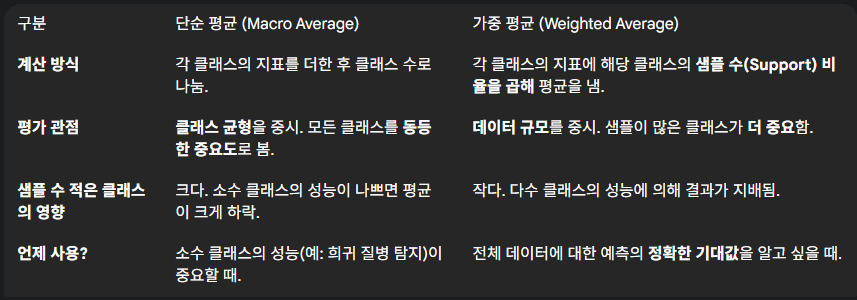

#### 분류 모델의 학습 결과

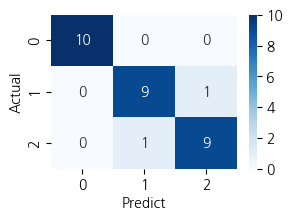

In [13]:
# --------------------------------
# 혼동행렬 (행=실제, 열=예측)
# --------------------------------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred, labels=[0,1,2])

plt.figure(figsize=(3,2))
sns.heatmap(cm, cmap='Blues', annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
pass

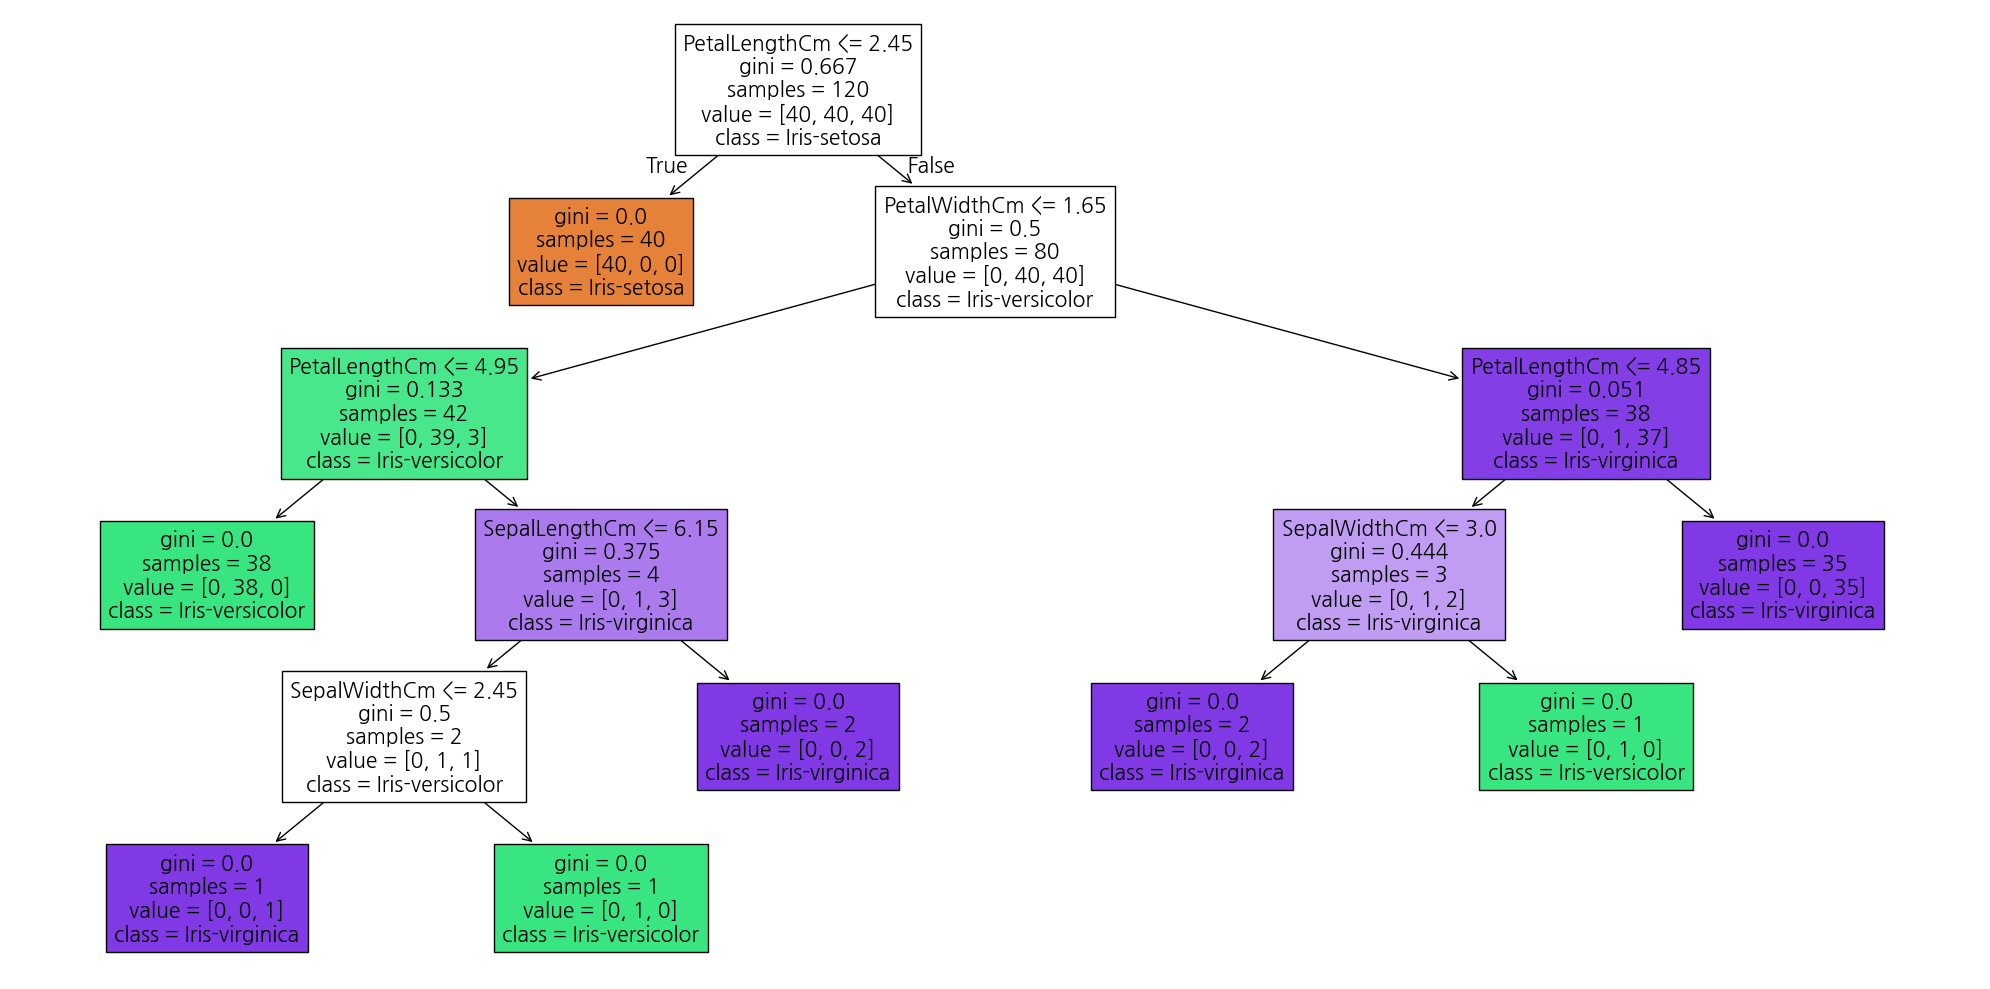

In [14]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X_train.columns,
          class_names=list(class_names.keys()),
          filled=True
          )
plt.tight_layout()
plt.show()

🌳 의사결정나무 구조와 클래스 분리

**분할 기준 (Feature Splitting)**

의사결정나무의 목표는 **불순도(Impurity)를 최소화**하는 방식으로 데이터를 나누는 것  
각 노드에서 나무는 가장 효과적인 특성(Feature)과 임계값을 찾아 데이터를 두 개의 자식 노드로 분할

- True 방향 (왼쪽): 분할 조건을 만족하는 데이터가 이동

- False 방향 (오른쪽): 분할 조건을 만족하지 않는 데이터가 이동

트리가 최종적으로 **리프 노드(Leaf Node)**에 도달했을 때 **gini = 0.0**이 되거나, 대부분의 데이터가 하나의 클래스(**class = ...**)에 속하게 되는 것이 중요

<br>

**노드 분할 기준(Gini Impurity 또는 Entropy)**

- 불순도 감소 최대화: 나무는 해당 노드에서 데이터를 분할했을 때 불순도를 가장 크게 감소시킬 수 있는 특성과 임계값(Threshold)을 찾음

    - 불순도는 노드 안에 여러 클래스의 데이터가 얼마나 섞여 있는지를 나타냄 (주요 지표: 지니 불순도(Gini Impurity) 또는 엔트로피(Entropy))

- 최적의 분할: 모델은 모든 가능한 특성과 임계값을 테스트해 보고, 분할 후 자식 노드들의 불순도 합계가 가장 낮은 분할을 선택

In [15]:
# --------------------------
# 트리의 깊이
#   get_depth()
# --------------------------
print(model.get_depth())

5


특성의 중요도: [0.00625    0.02916667 0.5585683  0.40601504]


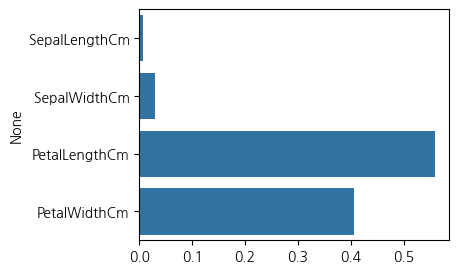

In [16]:
# --------------------------
# 특성의 중요도
# --------------------------
print(f'특성의 중요도: {model.feature_importances_}')

plt.figure(figsize=(4,3))
sns.barplot(y=X_train.columns, x=model.feature_importances_);

- 특성 중요도는 의사결정나무가 데이터를 분할하는 과정에서 전체 불순도를 감소시키는 데 기여한 정도를 측정한 값
    - 값이 높다: 해당 특성이 데이터를 분류하는 데 가장 큰 영향을 미쳤고, 불순도를 가장 많이 감소시켰다는 의미
- 특성의 중요도가 높은 특성일수록 의사결정나무의 상위 노드에서 분할 기준으로 선택될 확률이 매우 높음